<a href="https://colab.research.google.com/github/Bikomwangi/Supermarket.Marketing.Strategies/blob/main/Part_4_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection

In [ ]:
# loading libraries
library(tidyverse)
library(anomalize)

library(Amelia)

In [2]:
# loading the data set
url <- 'http://bit.ly/CarreFourSalesDataset'
data <- read.csv(url)

In [3]:
dim(data)

[1] 1000    2

In [4]:
head(data)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [5]:
# data types
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [6]:
# checking for missing values
colSums(sapply(data, is.na))

Date Sales 
    0     0

In [7]:
# duplicates
duplicated_rows <- data[duplicated(data),]  
duplicated_rows 

Date,Sales
<chr>,<dbl>


No duplicates

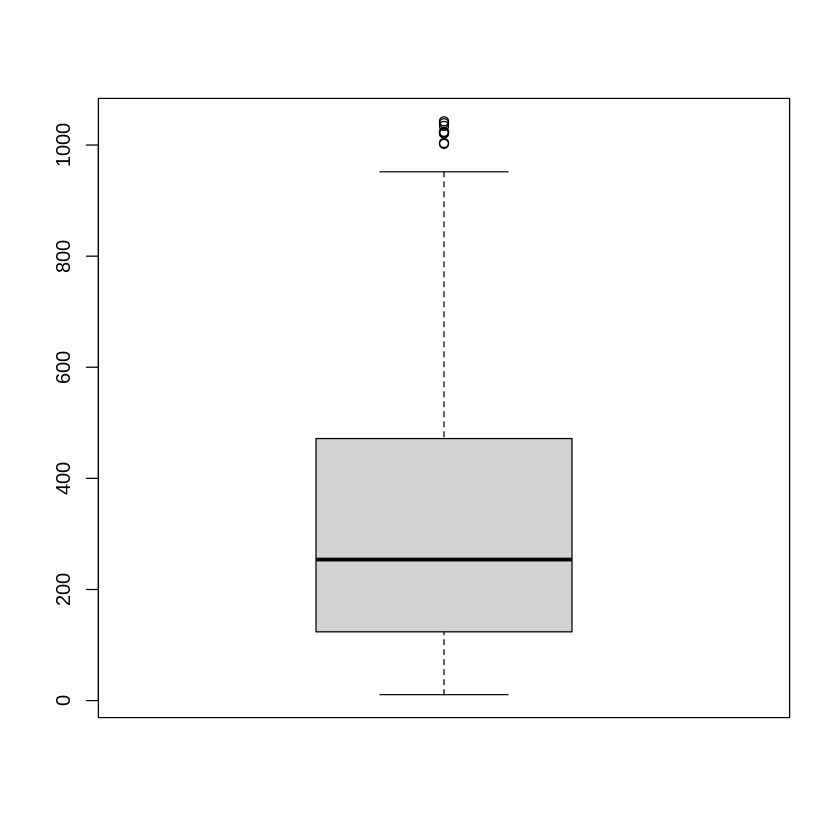

In [8]:
# Outliers in Sales
boxplot(data[,c(2)])

In [9]:
# converting to datetime
data$Date <- as.POSIXct(data$Date, "%m-%d-%Y",tz = "GMT")

# EDA

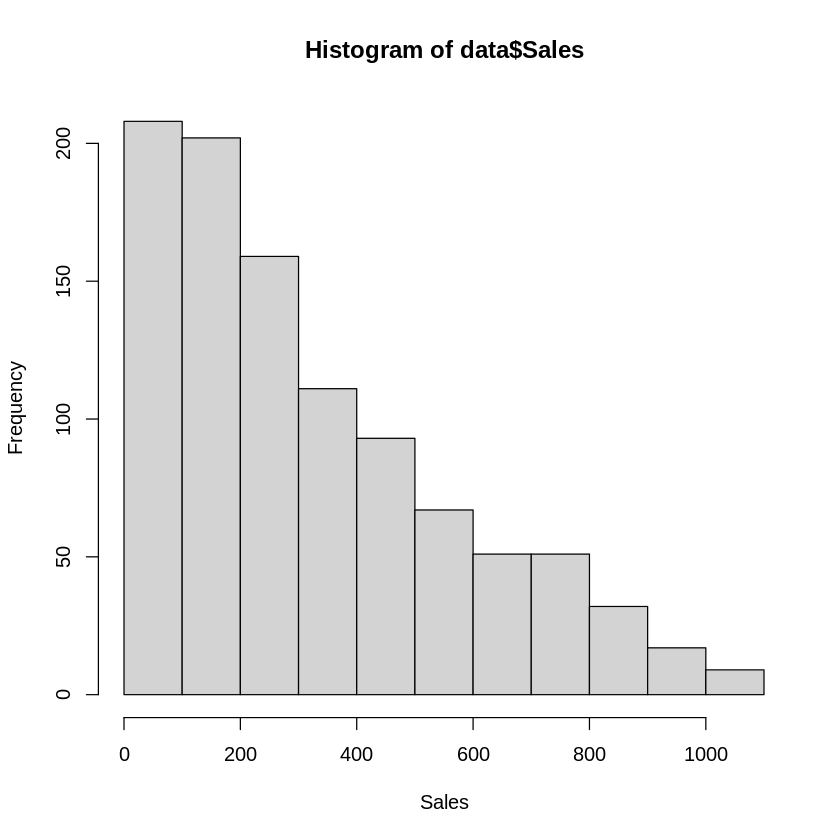

In [10]:
# Distribution of Sales
hist(data$Sales,
        xlab = "Sales",
        ylab = "Frequency")

In [16]:
# extracting the day and month from date 
data$day <- format(data$Date, "%d")
data$month <- format(data$Date, "%m")
data$day <- as.numeric(data$day)

In [12]:
# checking for corr. between day and sales
correlations <- cor(data[,2:3], method = "pearson")
correlations 

,Sales,day
Sales,1,NA
day,NA,1


No correlation between day and sales

# Checking for Anomalies

In [ ]:
# converting overall data to tibble
data_tibble <- as_tibble(data)
# Detecting Anomalies in overall sales
data_tibble %>%
    time_decompose(Sales) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

Insights;
- The analysis above reveals that there are no anomalies in the sales data. Anomalies would have been highlighted by red dots.